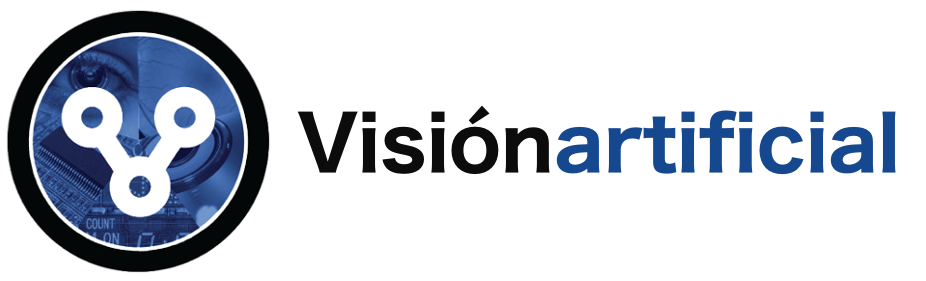

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
videoFileName = "../data/cycle.mp4"

In [4]:
cap = cv2.VideoCapture(videoFileName)

In [5]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('LK-output.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 20, (width,height))

# <font style="color:rgb(50,120,229)">Detectamos as esquimas para seguilas </font>
Usaremos o algoritmo de detección de esquinas de Shi Tomasi para atopar os puntos que seguiremos no vídeo. Impléméntase en OpenCV mediante a función `goodFeaturesToTrack`.

### <font style="color:rgb(8,133,37)">Sintaxe da función </font>

```python
cv2.goodFeaturesToTrack(image, maxCorners, qualityLevel, minDistance[, mask[, blockSize]])
```
where,

- `image` - Imaxe de entrada
- `maxCorners` - máximo número de esquinas a detectar
- `qualityLevel` - Parámetro que caracteriza a calidade mínima aceptable para as esquinas na imaxe. O valor do parámetro multiplícase pola mellor medida de calidade de esquina
- `minDistance` - Distancia euclidea mínima posible entre as esquinas que se van a devolver na función.
- `mask` - máscaras con rexións de interese (opcional)
- `blockSize` - Tamaño dun bloque medio para calcular a matriz de covariación dos gradientes sobre a vecindade do píxel

Imos a especificar os parámetros nun dicionario como se indica a continuación.

In [6]:
# parametros para o detector de ShiTomasi
numCorners = 100
feature_params = dict( maxCorners = numCorners,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# <font style="color:rgb(50,120,229)">Inicializamos o seguidor de Lucas Kanade</font>
Despois de detectar certos puntos no primeiro fotograma, queremos rastrexalos no seguinte fotograma. Isto faise usando o algoritmo de Lucas Kanade que está implementado en OpenCV na función seguinte

### <font style="color:rgb(8,133,37)">Sintaxe da función</font>

```python
nextPts, status, err = cv2.calcOpticalFlowPyrLK(prevImg, nextImg, prevPts[, winSize[, maxLevel[, criteria]]])
```

where,
- `prevImg` - imaxe previa
- `nextImg` - imaxe posterior
- `prevPts` - puntos na imaxe previa
- `nextPts` - puntos na imaxe posterior
- `winSize` - tamaño na ventá de bśuqueda en cada píxel
- `maxLevel` - Número máximo de niveles na pirámide. Se este parámetro se asigna a 0, non se usan pirámides (nivel único), se se establece en 1, utilízanse dous niveis, etc.
- `criteria` - parámetro, especificando os criterios de terminación do algoritmo de busca iterativa (despois do número máximo de iteracións especificado criteria.maxCount ou cando a xanela de busca se move menos que criteria.epsilon

In [9]:
# Parametros para o fluxo optico de Lucas kanade
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

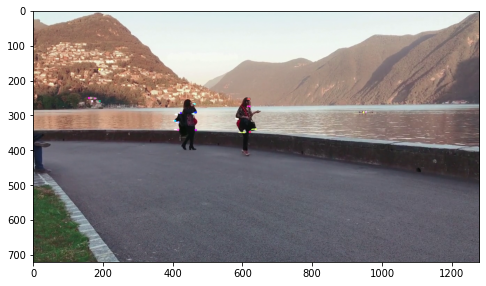

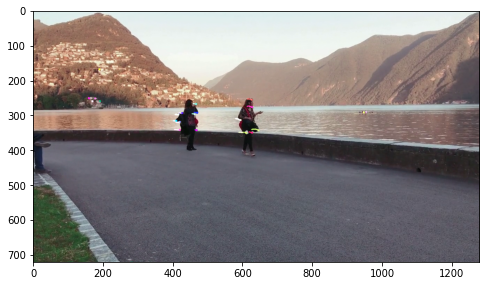

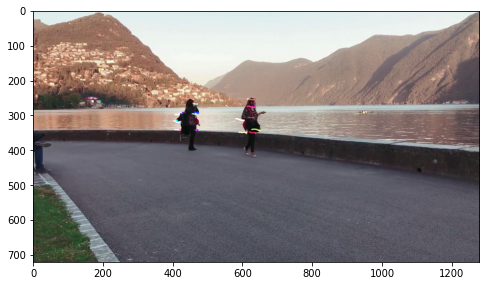

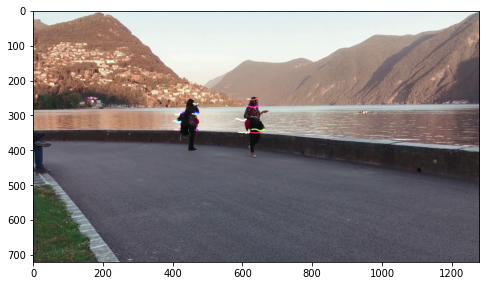

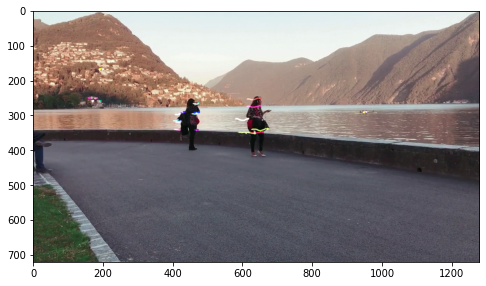

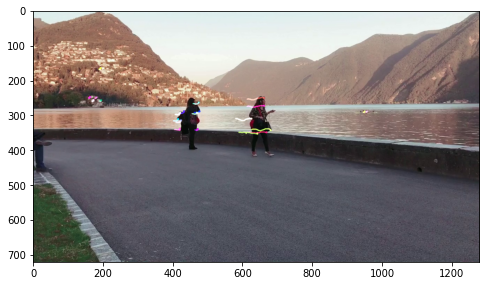

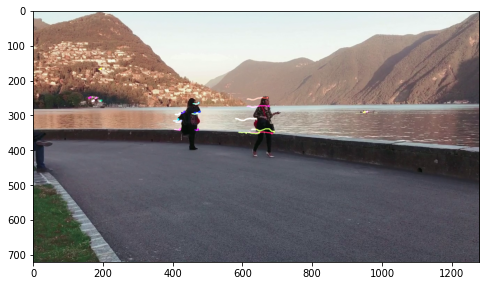

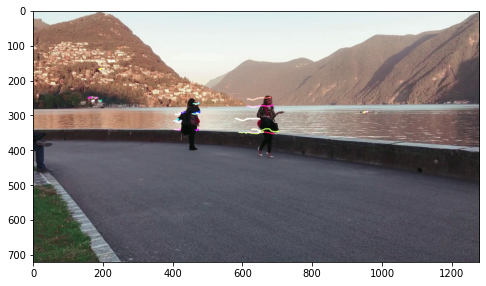

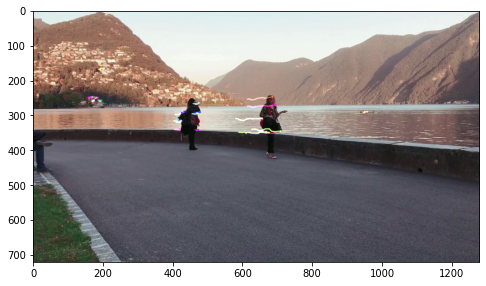

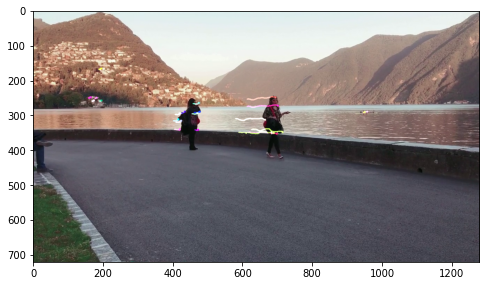

In [16]:
#Creamos cores aleatorias
color = np.random.randint(0,255,(numCorners,3))

# Collemos o primeiro fotograma e detectamos os puntos nel (esquinas)
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_points = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Creamos unha máscara para debuxar os tracks 
mask = np.zeros_like(old_frame)
count = 0
while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    count += 1
    # calculamos o fluxo óptico
    new_points, status, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, old_points, None, **lk_params)

    # seleccionamos os puntos mellores
    good_new = new_points[status==1]
    good_old = old_points[status==1]
    
    # debuxamos os tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        cv2.line(mask, (int(round(a)),int(round(b))),(int(round(c)),int(round(d))), color[i].tolist(), 2, cv2.LINE_AA)
        cv2.circle(frame,(int(round(a)),int(round(b))),3,color[i].tolist(), -1)
    
    
    # Visualizamos cada 5 fotogramas
    display_frame = cv2.add(frame,mask)
    out.write(display_frame)
    if count % 5 == 0:
        plt.imshow(display_frame[:,:,::-1])
        plt.show()
    if count > 50:
        break
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    
    # actualizamos os putnos e o frame anterior
    old_gray = frame_gray.copy()
    old_points = good_new.reshape(-1,1,2)

In [36]:
cap.release()
out.release()